# Data exploration analysis
Assignment 1
Elizabeth Valdez 

In [1]:
# Import libraries, required for data exploration
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#Importing the train data set : 3 months
df_3m = pd.read_csv('train_month_3_with_target.csv')

In [3]:
#Quick view of a sample of the data set
df_3m.sample(10)

client_id  homebanking_active  has_homebanking  \
61588  f05c68a682e4a65afc26dc0009a97ac8                   1                1   
59799  3e8b14e0e6e362f45ea997751e7a3a52                   0                0   
41802  5dff391eb5968cb69d0057fd03845321                   0                1   
59141  10ff7a15dfafa4b02c15a98034d0ad89                   0                0   
40353  df245814ebbcb6722acba06c0c42f40f                   0                0   
19030  4e000e42a536563e46f25e214521a32a                   0                0   
19259  5d433e11fdf4517bf42404176c1609ad                   1                1   
19147  be4d577c6b44a576461312ea6ba8d1cc                   0                0   
46094  a4b7c5f372eb1a499cd91ce310857fad                   0                0   
7188   5985d81056d0fff3198c1e986d323f5d                   1                1   

       has_insurance_21  has_insurance_23  has_life_insurance_fixed_cap  \
61588                 0                 0                             0   
59799                 0                 0                             0   
41802                 0                 0                             0   
59141                 0                 0                             0   
40353                 0                 0                             1   
19030                 0                 0                             0   
19259                 0                 0                             0   
19147                 0                 0                             0   
46094                 1                 0                             0   
7188                  1                 0                             0   

       has_life_insurance_decreasing_cap  has_fire_car_other_insurance  \
61588                                  0                             0   
59799                                  0                             0   
41802                                  0                             0   
59141                                  0                             0   
40353                                  0                             1   
19030                                  0                             1   
19259                                  0                             0   
19147                                  0                             0   
46094                                  0                             0   
7188                                   1                             1   

       has_personal_loan  has_mortgage_loan  ...  customer_since_bank  \
61588                  0                  0  ...              1993-04   
59799                  0                  0  ...              2016-02   
41802                  0                  0  ...              2006-07   
59141                  0                  0  ...              1979-09   
40353                  0                  0  ...              1984-04   
19030                  0                  0  ...              1990-12   
19259                  0                  0  ...              2004-10   
19147                  0                  0  ...              2013-03   
46094                  0                  0  ...              2018-01   
7188                   0                  1  ...              1994-11   

       customer_gender  customer_birth_date  customer_postal_code  \
61588                1              1993-03                  9551   
59799                1              1995-06                  9170   
41802                2              1960-06                  8930   
59141                1              1955-07                  6000   
40353                1              1950-05                  1340   
19030                2              1947-10                  9500   
19259                2              1990-09                  1850   
19147                1              1962-10                  2110   
46094                2              1985-10                  3128   
7188          

The dataset train 3 months includes information on 63697 clients, note that some variables have the same prefix and probably provide grouped info

In [4]:
# checking the type of variables 
df_3m.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63697 entries, 0 to 63696
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   client_id                          63697 non-null  object 
 1   homebanking_active                 63697 non-null  int64  
 2   has_homebanking                    63697 non-null  int64  
 3   has_insurance_21                   63697 non-null  int64  
 4   has_insurance_23                   63697 non-null  int64  
 5   has_life_insurance_fixed_cap       63697 non-null  int64  
 6   has_life_insurance_decreasing_cap  63697 non-null  int64  
 7   has_fire_car_other_insurance       63697 non-null  int64  
 8   has_personal_loan                  63697 non-null  int64  
 9   has_mortgage_loan                  63697 non-null  int64  
 10  has_current_account                63697 non-null  int64  
 11  has_pension_saving                 63697 non-null  int

In [5]:
df_3m["customer_birth_date"].head()

0    1943-09
1    1994-02
2    1936-10
3    1946-09
4    1996-04
Name: customer_birth_date, dtype: object

In [7]:
#Transform to date 
df_3m["customer_since_all"] = pd.to_datetime(df_3m["customer_since_all"], format='%Y-%m')
df_3m["customer_since_bank"] = pd.to_datetime(df_3m["customer_since_bank"], format='%Y-%m')
df_3m["customer_birth_date"] = pd.to_datetime(df_3m["customer_birth_date"], format='%Y-%m')


In [8]:
from datetime import datetime
#function for to turn date into years since 2018
def from_dob_to_age(born):
    today = '1/01/2018'
    today = datetime.strptime(today, "%d/%m/%Y").date()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [9]:
#Create new variables with years 
df_3m["customer_age"] = df_3m["customer_birth_date"].apply(lambda x: from_dob_to_age(x))
df_3m["customer_since_a_y"] = df_3m["customer_since_all"].apply(lambda x: from_dob_to_age(x))
df_3m["customer_since_bank_y"] = df_3m["customer_since_bank"].apply(lambda x: from_dob_to_age(x))


In [10]:
#Check date variables
df_3m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63697 entries, 0 to 63696
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   client_id                          63697 non-null  object        
 1   homebanking_active                 63697 non-null  int64         
 2   has_homebanking                    63697 non-null  int64         
 3   has_insurance_21                   63697 non-null  int64         
 4   has_insurance_23                   63697 non-null  int64         
 5   has_life_insurance_fixed_cap       63697 non-null  int64         
 6   has_life_insurance_decreasing_cap  63697 non-null  int64         
 7   has_fire_car_other_insurance       63697 non-null  int64         
 8   has_personal_loan                  63697 non-null  int64         
 9   has_mortgage_loan                  63697 non-null  int64         
 10  has_current_account               

In [16]:
df_3m.columns.values.tolist()

['client_id',
 'homebanking_active',
 'has_homebanking',
 'has_insurance_21',
 'has_insurance_23',
 'has_life_insurance_fixed_cap',
 'has_life_insurance_decreasing_cap',
 'has_fire_car_other_insurance',
 'has_personal_loan',
 'has_mortgage_loan',
 'has_current_account',
 'has_pension_saving',
 'has_savings_account',
 'has_savings_account_starter',
 'has_current_account_starter',
 'bal_insurance_21',
 'bal_insurance_23',
 'cap_life_insurance_fixed_cap',
 'cap_life_insurance_decreasing_cap',
 'prem_fire_car_other_insurance',
 'bal_personal_loan',
 'bal_mortgage_loan',
 'bal_current_account',
 'bal_pension_saving',
 'bal_savings_account',
 'bal_savings_account_starter',
 'bal_current_account_starter',
 'visits_distinct_so',
 'visits_distinct_so_areas',
 'customer_since_all',
 'customer_since_bank',
 'customer_gender',
 'customer_birth_date',
 'customer_postal_code',
 'customer_occupation_code',
 'customer_self_employed',
 'customer_education',
 'customer_children',
 'customer_relationship

In [18]:
num_variables = [ 'bal_insurance_21',
 'bal_insurance_23',
 'cap_life_insurance_fixed_cap',
 'cap_life_insurance_decreasing_cap',
 'prem_fire_car_other_insurance',
 'bal_personal_loan',
 'bal_mortgage_loan',
 'bal_current_account',
 'bal_pension_saving',
 'bal_savings_account',
 'bal_savings_account_starter',
 'bal_current_account_starter',
  'target',
 'customer_age',
 'customer_since_a_y',
 'customer_since_bank_y']

df_num = df_3m[num_variables]

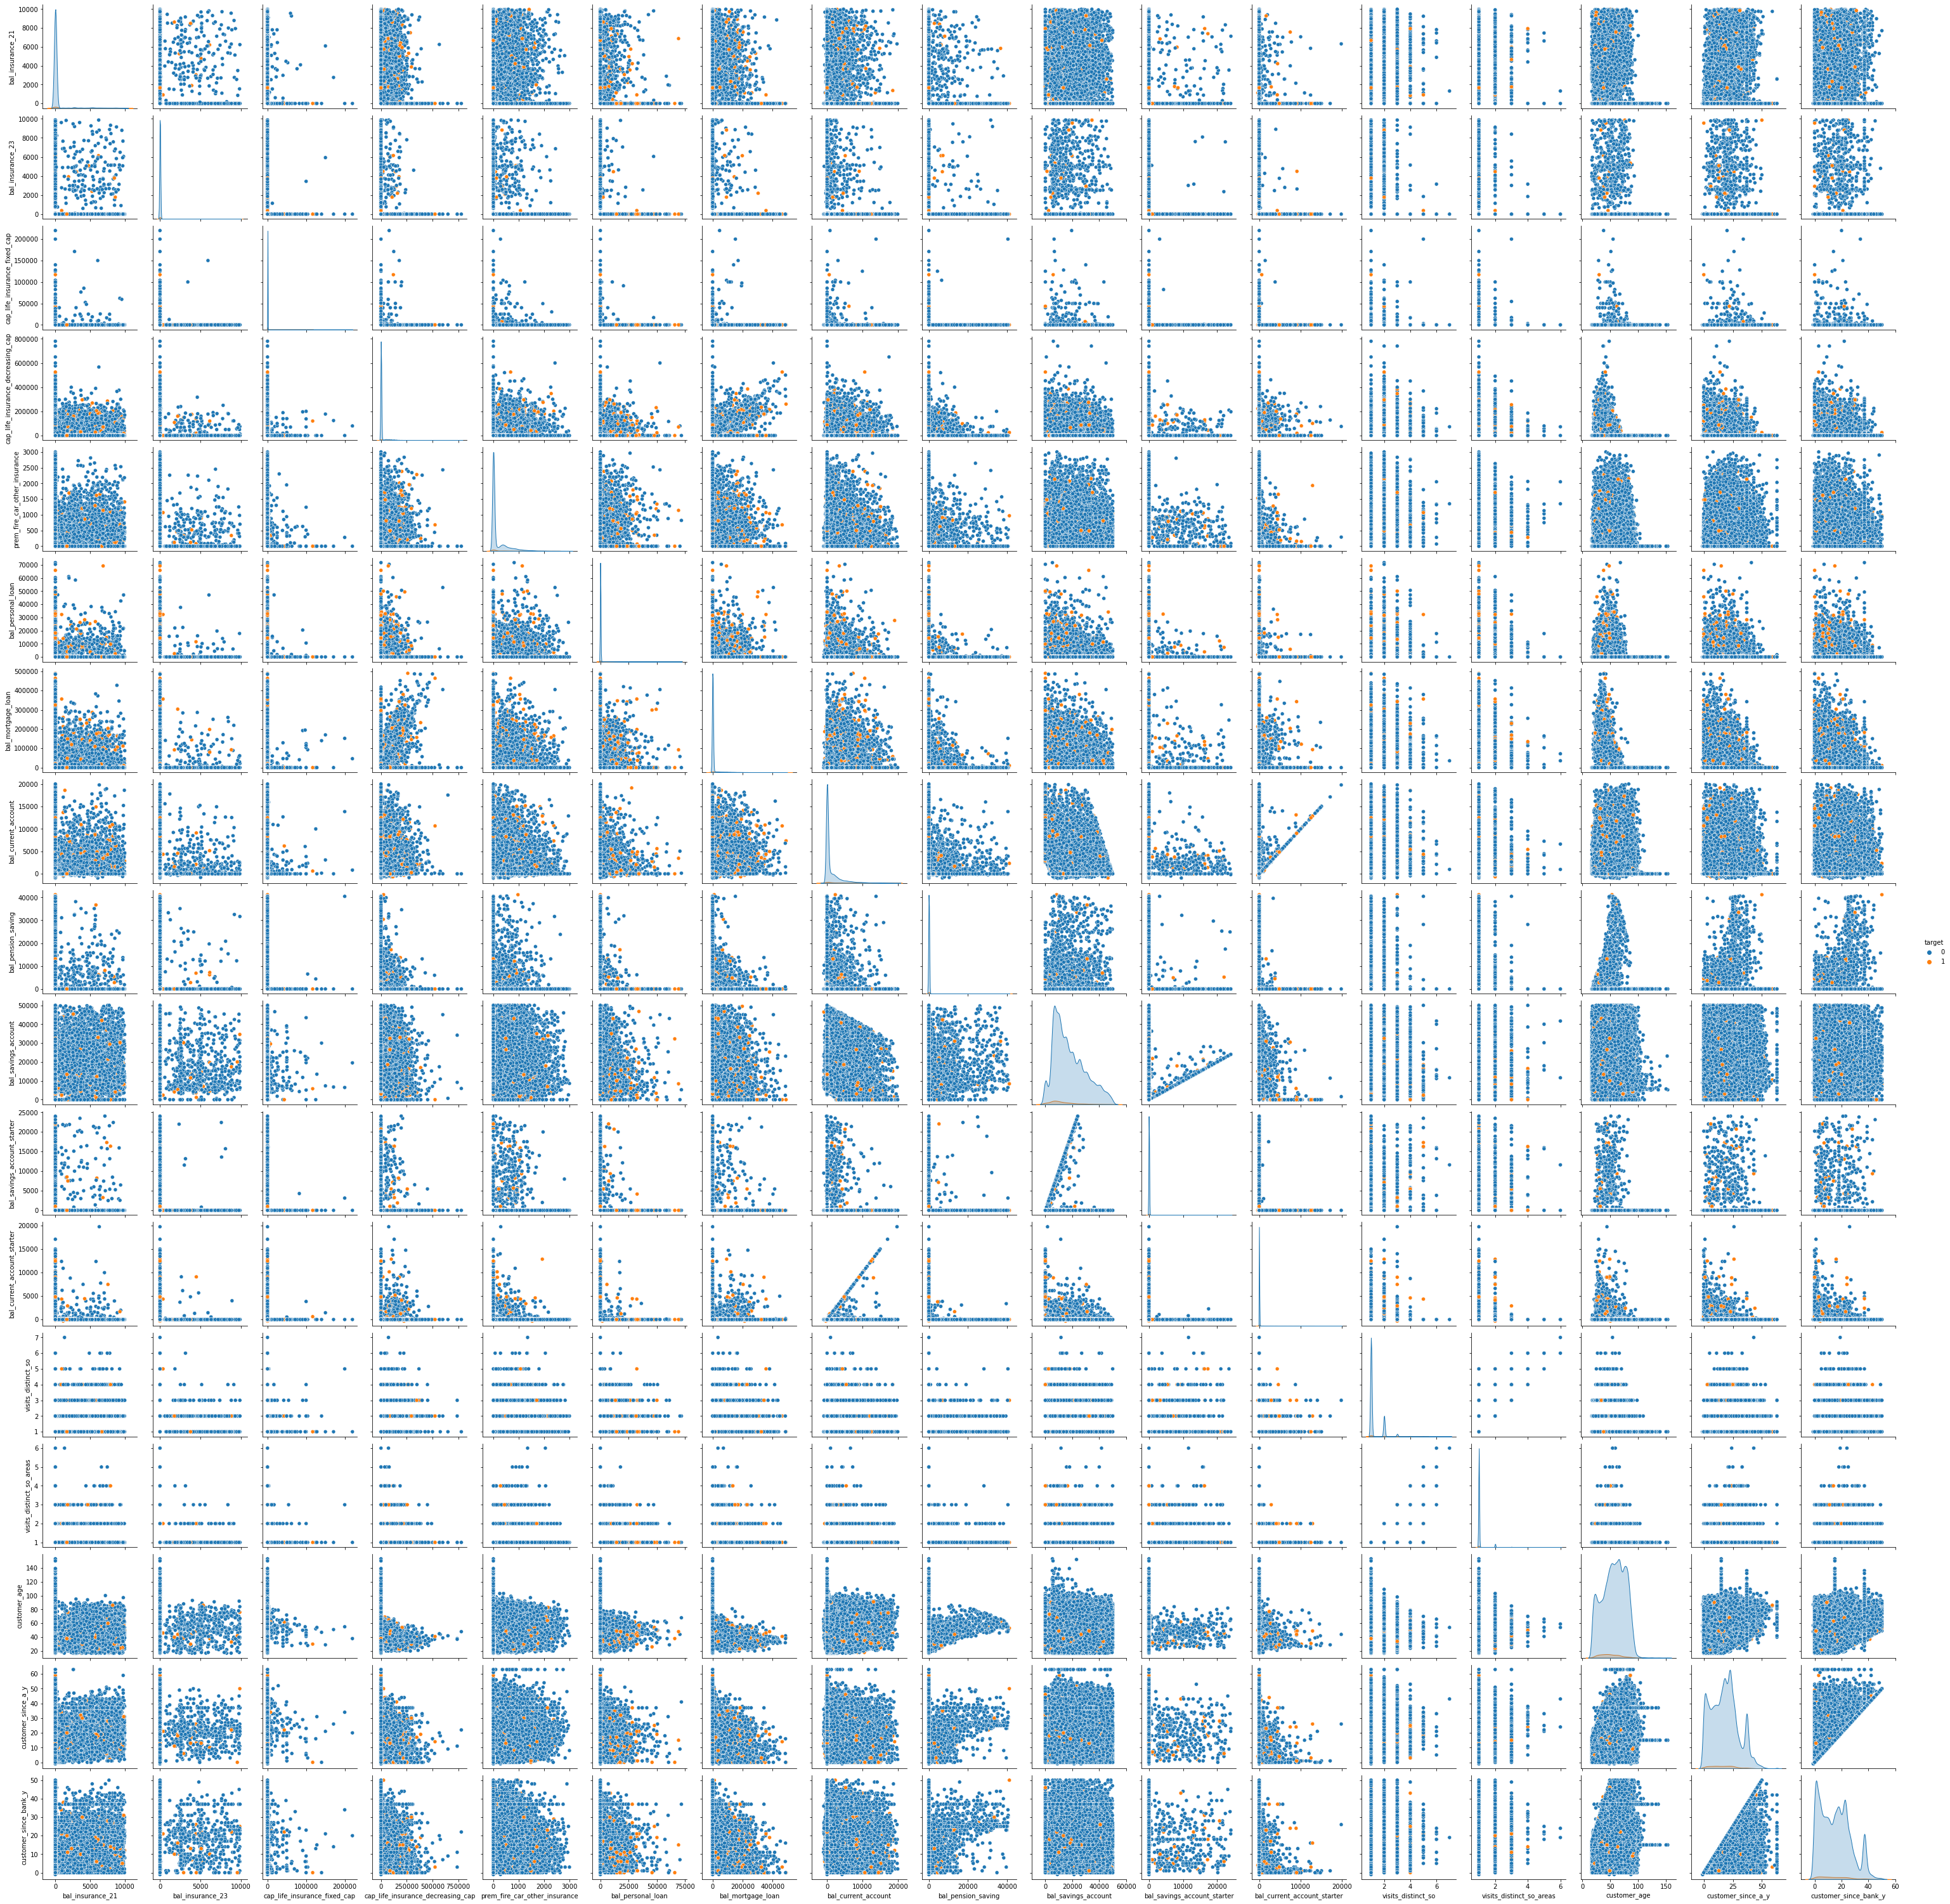

<Figure size 3102.38x3060 with 0 Axes>

In [20]:
# Scatterplot 
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt 

sns_plot = sns.pairplot(df_num, hue= 'target')
sns_plot.savefig("pairplot.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='pairplot.png') # Show pairplot as image

In [27]:
# Means of features by target
grouped_df = df_3m.groupby("target")
mean_df = grouped_df.mean()
mean_df = mean_df.reset_index()
mean_df

# Variables

target  bal_insurance_21  bal_insurance_23  cap_life_insurance_fixed_cap  \
0       0        454.805289         47.155898                     77.963065   
1       1        559.853633         56.361735                     87.851542   

   cap_life_insurance_decreasing_cap  prem_fire_car_other_insurance  \
0                       10953.333387                     181.935453   
1                       31338.944067                     239.592263   

   bal_personal_loan  bal_mortgage_loan  bal_current_account  \
0         374.663181        8264.626926          1293.941635   
1        1300.522739       28382.242551          2283.491898   

   bal_pension_saving  bal_savings_account  bal_savings_account_starter  \
0          233.363654         18020.610352                    55.277256   
1          235.305802         13088.489284                   133.988500   

   bal_current_account_starter  visits_distinct_so  visits_distinct_so_areas  \
0                    28.504953            1.226466                  1.041548   
1                    88.970204            1.350758                  1.076843   

   customer_age  customer_since_a_y  customer_since_bank_y  
0     55.900994            17.98564              15.338673  
1     48.954522            16.81010              14.377041

In [28]:
df_3m.describe()

bal_insurance_21  bal_insurance_23  cap_life_insurance_fixed_cap  \
count      63697.000000      63697.000000                  63697.000000   
mean         457.960187         47.432375                     78.260044   
std         1641.970743        536.978630                   2538.927213   
min            0.000000          0.000000                      0.000000   
25%            0.000000          0.000000                      0.000000   
50%            0.000000          0.000000                      0.000000   
75%            0.000000          0.000000                      0.000000   
max        10000.000000       9890.000000                 220000.000000   

       cap_life_insurance_decreasing_cap  prem_fire_car_other_insurance  \
count                       63697.000000                   63697.000000   
mean                        11565.570592                     183.667049   
std                         40229.761726                     368.599652   
min                             0.000000                       0.000000   
25%                             0.000000                       0.000000   
50%                             0.000000                       0.000000   
75%                             0.000000                     240.000000   
max                        780000.000000                    3000.000000   

       bal_personal_loan  bal_mortgage_loan  bal_current_account  \
count       63697.000000       63697.000000         63697.000000   
mean          402.469347        8868.815486          1323.660612   
std          2662.560352       35525.256697          2685.727023   
min             0.000000           0.000000         -1000.000000   
25%             0.000000           0.000000             0.000000   
50%             0.000000           0.000000             0.000000   
75%             0.000000           0.000000          1520.000000   
max         71690.000000      490000.000000         20000.000000   

       bal_pension_saving  bal_savings_account  bal_savings_account_starter  \
count        63697.000000         63697.000000                 63697.000000   
mean           233.421982         17872.484889                    57.641176   
std           2140.173418         11750.868466                   892.959859   
min              0.000000             0.000000                     0.000000   
25%              0.000000          8450.000000                     0.000000   
50%              0.000000         15170.000000                     0.000000   
75%              0.000000         25480.000000                     0.000000   
max          41170.000000         50000.000000                 24050.000000   

       bal_current_account_starter  visits_distinct_so  \
count                 63697.000000        63697.000000   
mean                     30.320894            1.230199   
std                     407.877892            0.501498   
min                    -330.000000            1.000000   
25%                       0.000000            1.000000   
50%                       0.000000            1.000000   
75%                       0.000000            1.000000   
max                   19790.000000            7.000000   

       visits_distinct_so_areas  customer_age  customer_since_a_y  \
count              63697.000000  63697.000000        63463.000000   
mean                   1.042608     55.692372           17.950428   
std                    0.224991     20.045278           11.442570   
min                    1.000000     17.000000           -1.000000   
25%                    1.000000     40.000000            9.000000   
50%                    1.000000     57.000000           18.000000   
75%                    1.000000     72.000000           25.000000   
max                    6.000000    153.000000           63.000000   

       customer_since_bank_y  
count           63448.000000  
mean               15.309892  
std                11.094540  
min                -1.000000  
25%                 5.000000  

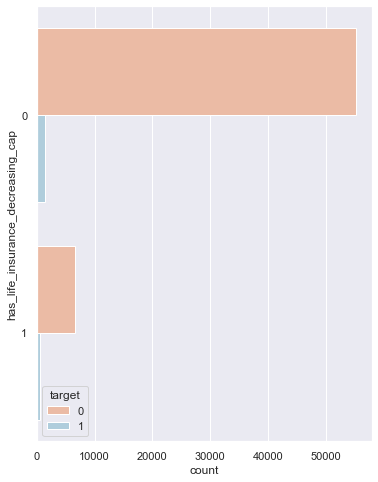

In [24]:
sns.set(rc={'figure.figsize':(6,8)})
plt.figure()
sns.countplot(y ='has_life_insurance_decreasing_cap', hue='target', data=df_3m, palette='RdBu')
plt.show()

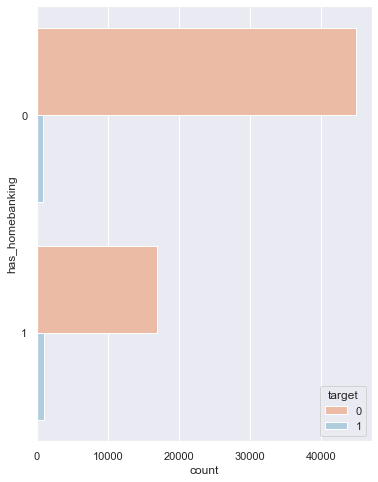

In [22]:
sns.set(rc={'figure.figsize':(6,8)})
plt.figure()
sns.countplot(y ='has_homebanking', hue='target', data=df_3m, palette='RdBu')
plt.show()

In [25]:
# Import libraries for PCA analysis
from prince import FAMD
famd = FAMD()


In [44]:
#Set variables

for col in ['homebanking_active',
 'has_homebanking',
 'has_insurance_21',
 'has_insurance_23',
 'has_life_insurance_fixed_cap',
 'has_life_insurance_decreasing_cap',
 'has_fire_car_other_insurance',
 'has_personal_loan',
 'has_mortgage_loan',
 'has_current_account',
 'has_pension_saving',
 'has_savings_account',
 'has_savings_account_starter',
 'has_current_account_starter',
  'customer_gender',
           'customer_postal_code','customer_occupation_code',
 'customer_self_employed',
 'customer_education',
 'customer_children',
 'customer_relationship',
 'target']:
    df_3m[col] = df_3m[col].astype('object')

     
df = df_3m.drop(['client_id','customer_since_all','customer_since_bank','customer_birth_date'], axis=1)



In [50]:
scaled_data

array([[-0.27891105, -0.08833265, -0.0308243 , ...,  0.91332095,
         1.40263062,  0.69314895],
       [-0.27891105, -0.08833265, -0.0308243 , ..., -1.63093915,
        -1.48135968, -1.28982398],
       [-0.27891105, -0.08833265, -0.0308243 , ...,  1.26253312,
         1.66481156,  1.9550408 ],
       ...,
       [-0.27891105, -0.08833265, -0.0308243 , ..., -0.732965  ,
         0.7908751 ,  1.05368948],
       [-0.27891105, -0.08833265, -0.0308243 , ...,  0.51422132,
        -1.30657239, -1.10955371],
       [-0.27891105, -0.08833265, -0.0308243 , ..., -1.68082661,
        -0.25784864, -0.02793212]])

In [47]:
col = ['homebanking_active',
 'has_homebanking',
 'has_insurance_21',
 'has_insurance_23',
 'has_life_insurance_fixed_cap',
 'has_life_insurance_decreasing_cap',
 'has_fire_car_other_insurance',
 'has_personal_loan',
 'has_mortgage_loan',
 'has_current_account',
 'has_pension_saving',
 'has_savings_account',
 'has_savings_account_starter',
 'has_current_account_starter',
  'customer_gender',
           'customer_postal_code','customer_occupation_code',
 'customer_self_employed',
 'customer_education',
 'customer_children',
 'customer_relationship',
 'target']

In [53]:
from sklearn.preprocessing import StandardScaler
 
scale= StandardScaler()
scaled_data = scale.fit_transform(df[num_variables])
scaled_data = pd.DataFrame(scaled_data)
cat_df = pd.DataFrame(df[col])
df_c = pd.concat([scaled_data.reset_index(drop=True),cat_df], axis=1)

In [ ]:
# 